### Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from scipy import stats

### Importing the Dataset

In [2]:
df = pd.read_excel('Globe Temperature Prediction Database.xlsx')

In [3]:
print(df)

       Air temperature (°C)  Radiant temperature (°C)  Air velocity (m/s)  \
0                      25.4                      26.6                0.08   
1                      25.9                      27.5                0.13   
2                      21.7                      23.8                0.14   
3                      25.5                      26.6                0.06   
4                      25.3                      27.2                0.07   
...                     ...                       ...                 ...   
21722                  23.6                      24.2                0.15   
21723                  23.0                      23.5                0.17   
21724                  23.4                      23.7                0.07   
21725                  24.2                      24.5                0.11   
21726                  24.2                      24.7                0.12   

       Globe temperature (°C)  
0                        26.1  
1          

### Removing Outliers Points

In [4]:
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))  # Only numeric columns
    outliers = (z_scores > threshold).any(axis=1)
    print(f"Number of outliers detected: {outliers.sum()}")
    return df[~outliers]

In [5]:
# Apply outlier point removal
response_column = 'Globe temperature (°C) [MRT]'
dataset = remove_outliers_zscore(df)

# Dataset is now ready for any machine learning model
print(f"Shape of dataset after cleaning: {dataset.shape}")

Number of outliers detected: 694
Shape of dataset after cleaning: (21033, 4)


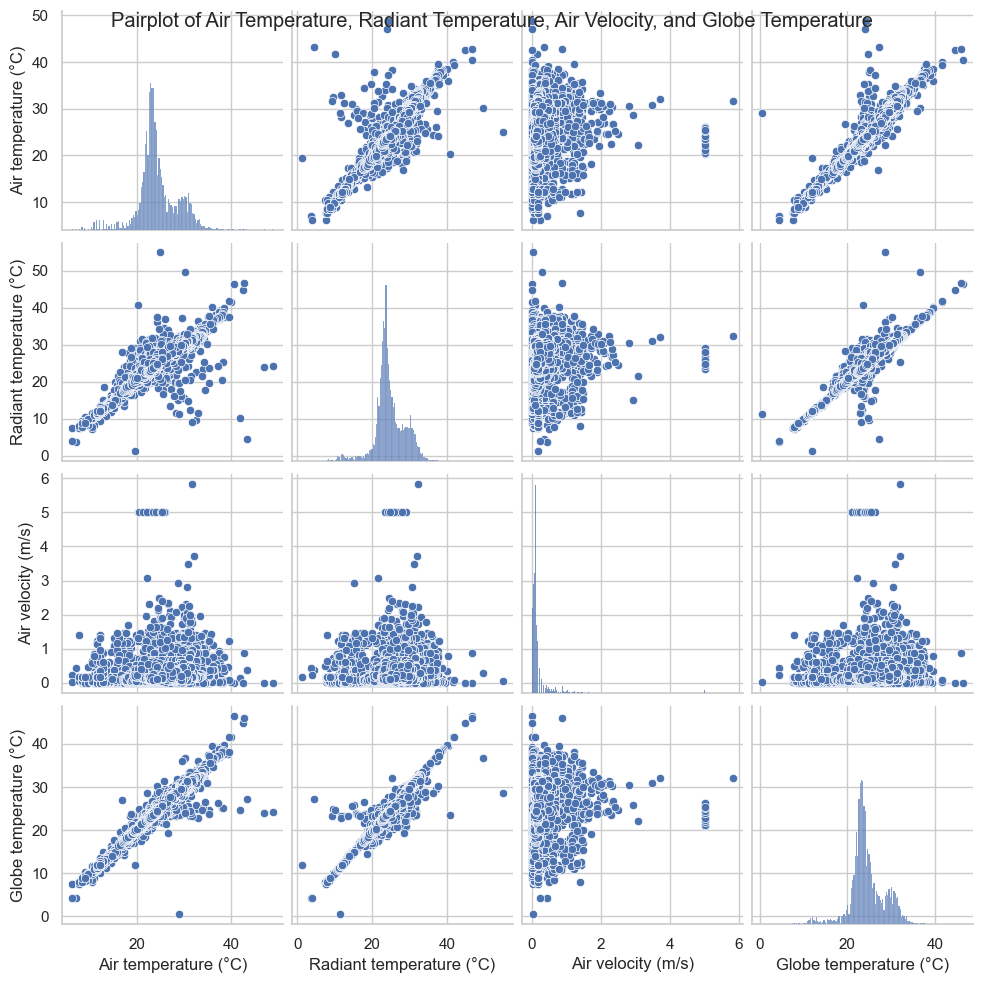

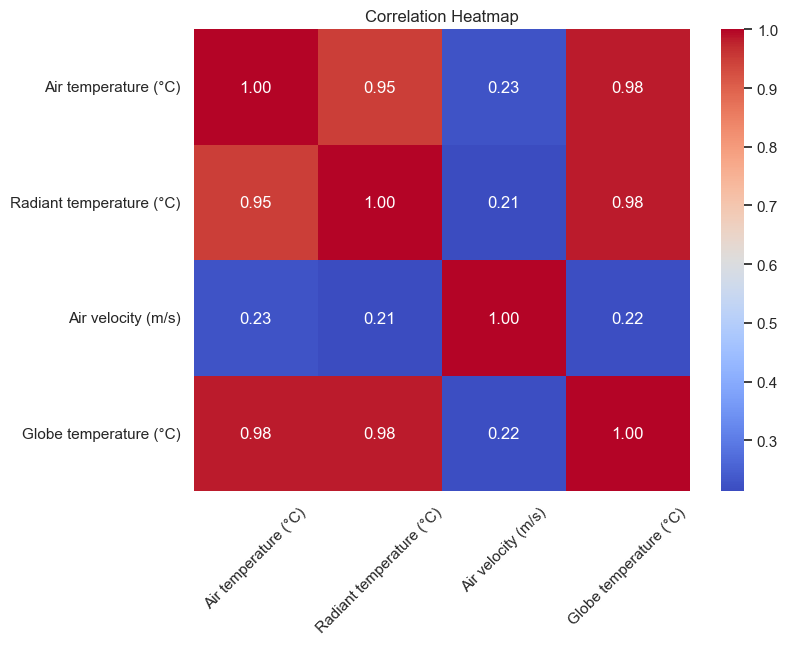

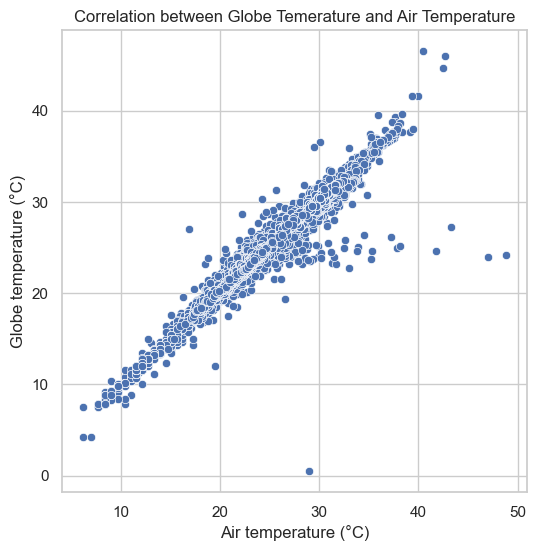

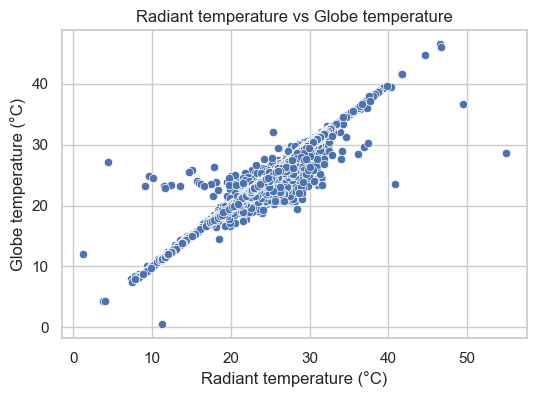

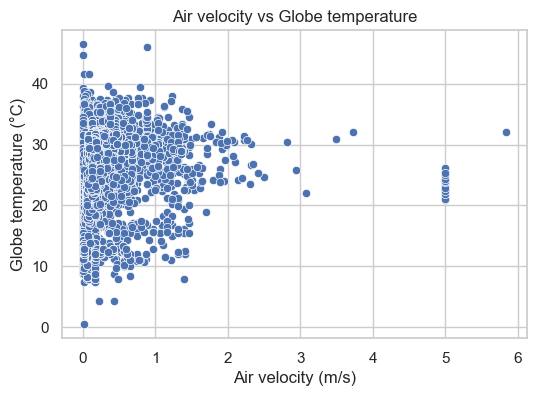

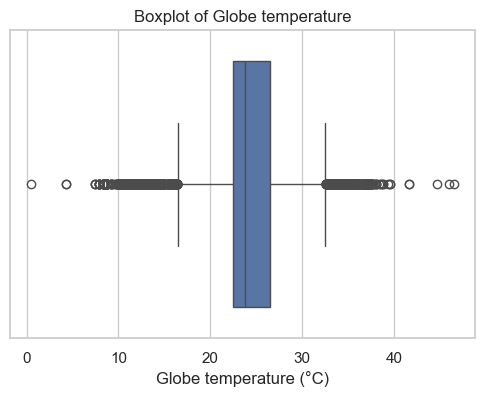

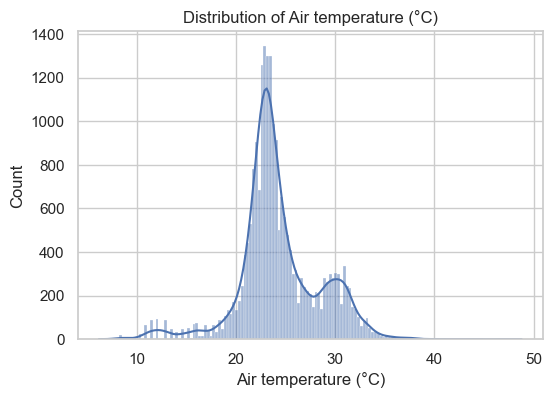

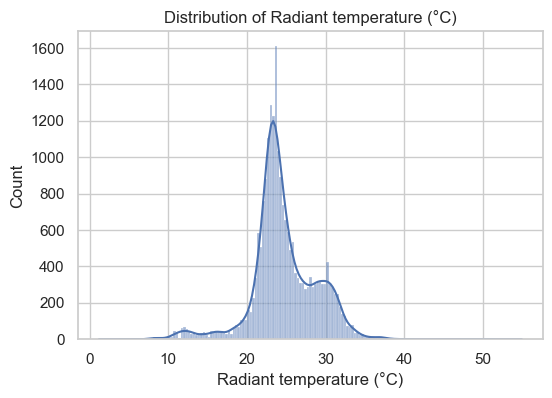

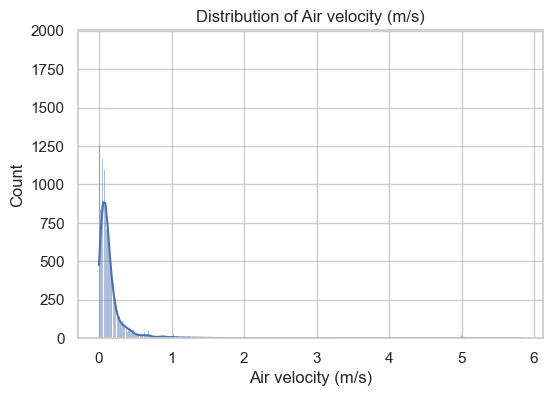

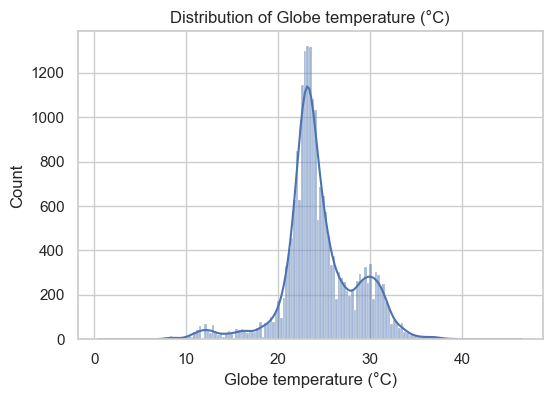

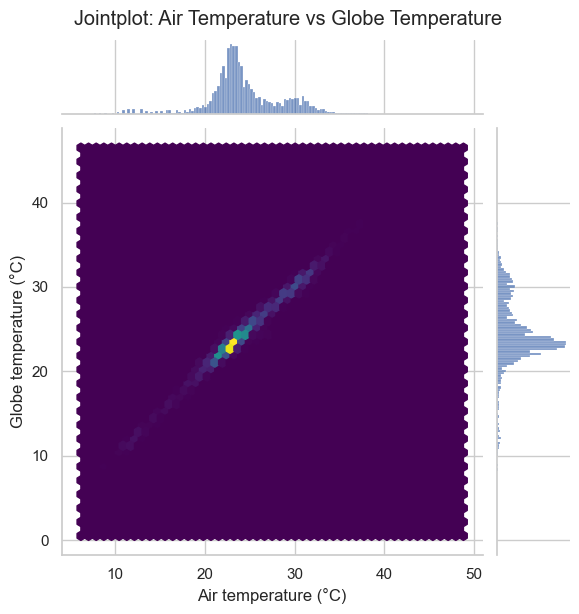

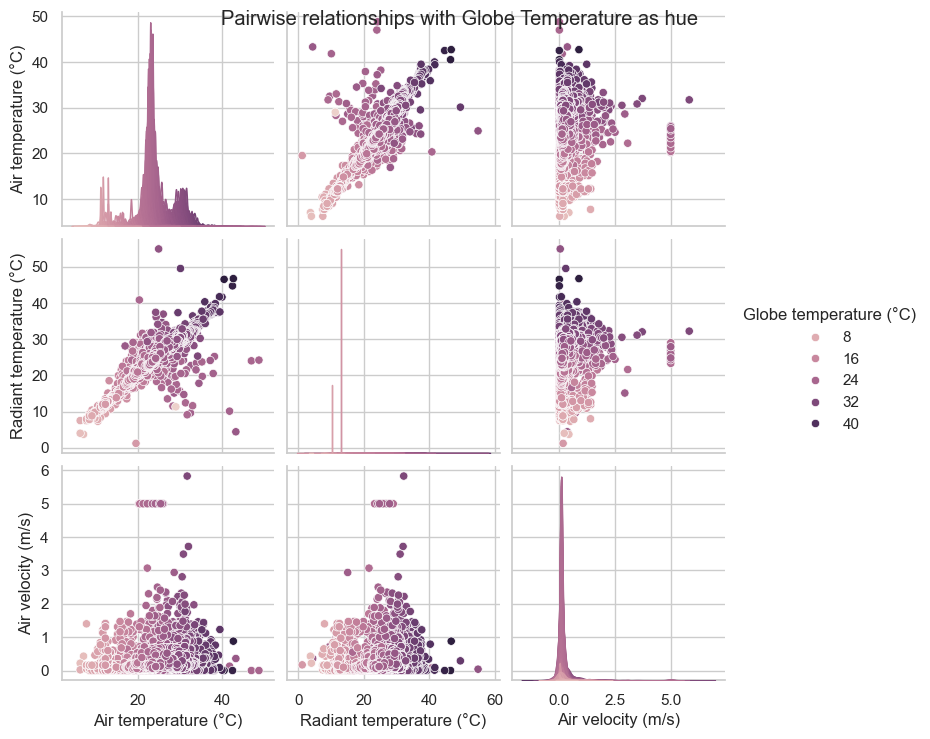

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Set seaborn style
sns.set(style="whitegrid")

# Pairplot to visualize relationships between all variables
sns.pairplot(df)
plt.suptitle("Pairplot of Air Temperature, Radiant Temperature, Air Velocity, and Globe Temperature")
plt.show()

# Correlation heatmap to see correlation between variables
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=45)
plt.title("Correlation Heatmap")
plt.show()

# Scatterplot for Air temperature vs Globe temperature
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x="Air temperature (°C)", y="Globe temperature (°C)")
plt.title("Correlation between Globe Temerature and Air Temperature")
plt.show()

# Scatterplot for Radiant temperature vs Globe temperature
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x="Radiant temperature (°C)", y="Globe temperature (°C)")
plt.title("Correlaton between Globe Temperature and Radiant Temperature")
plt.show()

# Scatterplot for Air velocity vs Globe temperature
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x="Air velocity (m/s)", y="Globe temperature (°C)")
plt.title("Air velocity vs Globe temperature")
plt.show()

# Boxplot to visualize the distribution of Globe temperature
plt.figure(figsize=(8, 8))
sns.boxplot(x=df["Globe temperature (°C)"])
plt.title("Boxplot of Globe temperature")
plt.show()

# Distribution plots for each feature and the response
features = ["Air temperature (°C)", "Radiant temperature (°C)", "Air velocity (m/s)", "Globe temperature (°C)"]
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

# Jointplot of Air temperature and Globe temperature
sns.jointplot(data=df, x="Air temperature (°C)", y="Globe temperature (°C)", kind="hex", cmap="viridis")
plt.suptitle("Jointplot: Air Temperature vs Globe Temperature", y=1.02)
plt.show()

# Pairwise relationships using pairplot, hue set to 'Globe temperature'
sns.pairplot(df, hue="Globe temperature (°C)")
plt.suptitle("Pairwise relationships with Globe Temperature as hue")
plt.show()
